### 随机森林：是bagging装袋法的代表。弱学习器只可以是决策树
- 简介：
    - 随机森林是一种有监督学习算法，是以决策树为基学习器的集成学习算法。随机森林非常简单，易于实现，计算开销也很小，在分类和回归上表现出非常惊人的性能，因此，随机森林被誉为“代表集成学习技术水平的方法”。

- 随机森林的随机性体现在哪几个方面呢？
    - 1.数据集的随机选择
        - 从原始数据集中采取《有放回的抽样bagging》，构造子数据集。不同子数据集的元素可以重复
    - 2.待选特征的随机选取
        - 随机森林中的子树的每一个分枝过程并未用到所有的待选特征，而是从所有的待选特征中随机选取一定的特征，之后再随机选取的特征中选取最优（最佳分支）的特征。

- 随机森林的重要作用：
    - 可以用于分类问题，也可以用于回归问题
    - 可以解决模型过拟合的问题，对于随机森林来说，如果随机森林中的树足够多且基于上述两个随机性的作用，那么分类器就不会出现过拟合
    - 可以检测出特征的重要性，从而选取好的特征

- 随机森林的构建过程
    - 1.从原始训练集中随机有放回采样取出m个样本,生成m个训练集
    - 2.对m个训练集，我们分别训练m个决策树模型
    - 3.对于单个决策树模型，假设训练样本特征的个数为n，那么每次分裂时根据信息增益/基尼指数 选择最好的特征进行分裂
    - 4.将生成的多颗决策树组成随机森林。对于分类问题，按照多棵树分类器投票决定最终分类结果；对于回归问题，由多颗树预测值的均值决定最终预测结果
    ![](noteimg/ft01.png)

- 优点
    - 1.由于采用了集成算法，本身精度比大多数单个算法要好，所以准确性高
    - 2.由于两个随机性的引入，使得随机森林不容易陷入过拟合（样本随机，特征随机）
    - 3.在工业上，由于两个随机性的引入，使得随机森林具有一定的抗噪声能力，对比其他算法具有一定优势
    - 4.它能够处理很高维度（feature很多）的数据，并且不用做特征选择，对数据集的适应能力强：既能处理离散型数据，也能处理连续型数据
    - 5.在训练过程中，能够检测到feature间的互相影响，且可以得出feature的重要性，具有一定参考意义
- 缺点
    - 1.当随机森林中的决策树个数很多时，训练时需要的空间和时间会比较大

- 在sklearn.ensemble库中，我们可以找到Random Forest分类和回归的实现：
    - RandomForestClassifier
    - RandomForestRegression 

In [1]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier()

#### 控制弱评估器的参数
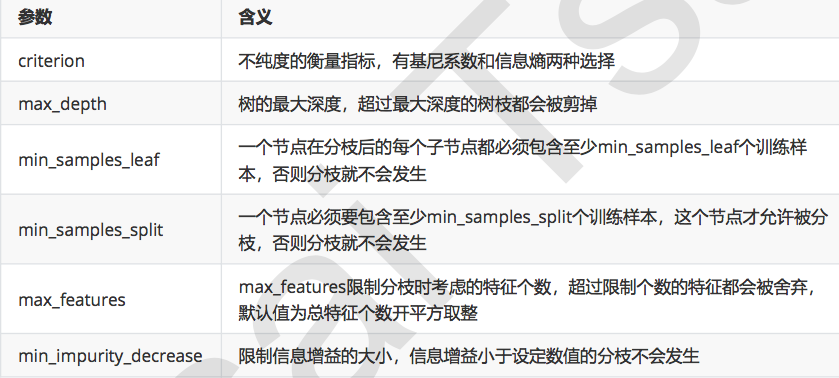

#### n_estimators
- 这是森林中树木的数量，即基评估器的数量。这个参数对随机森林模型的精确性影响是单调的，n_estimators越大，模型的效果往往越好。但是相应的，任何模型都有决策边界，n_estimators达到一定的程度之后，随机森林的 精确性往往不在上升或开始波动，并且，n_estimators越大，需要的计算量和内存也越大，训练的时间也会越来越 长。对于这个参数，我们是渴望在训练难度和模型效果之间取得平衡。
- n_estimators的默认值在现有版本的sklearn中是10，但是在即将更新的0.22版本中，这个默认值会被修正为 100。这个修正显示出了使用者的调参倾向:要更大的n_estimators。

#### 建立森林
- 树模型的优点是简单易懂，可视化之后的树人人都能够看懂，可惜随机森林是无法被可视化的。所以为了更加直观地让大家体会随机森林的效果，我们来进行一个随机森林和单个决策树效益的对比。我们依然使用红酒数据集。

In [3]:
from sklearn.model_selection import train_test_split
import sklearn.datasets as dt

data = dt.load_breast_cancer()
feature = data.data
target = data.target

x_train,x_test,y_train,y_test = train_test_split(feature,target,test_size=0.2,random_state=2021)

In [8]:
rf = RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9649122807017544

#### 画出随机森林和决策树在一组交叉验证下的效果对比（查看n_estimators是否存在上限）

#### random_state
- 随机森林中的random_state控制的是生成森林的模式，类似决策树中的random_state，用来固定森林中树的随机性。当random_state固定时，随机森林中生成是一组固定的树。

In [23]:
rf = RandomForestClassifier(random_state=2021)
rf.fit(x_train,y_train)
rf.score(x_test,y_test)

0.9649122807017544

#### bootstrap & oob_score
- bootstrap：
    - 装袋法是通过有放回的随机抽样技术来形成不同的训练数据，bootstrap就是用来控制抽样技术的参数。我们进行样本的随机采样，每次采样一个样本，并在抽取下一个样本之前将该样本 放回原始训练集，也就是说下次采样时这个样本依然可能被采集到。bootstrap参数默认True，代表采用这种有放回的随机抽样技术。通常，这个参数不会被我们设置为False。
- oob_score：
    - 然而有放回抽样也会有自己的问题。由于是有放回，一些样本可能会被采集多次，而其他一些样本却可能被忽略，一次都未被采集到。那么这些被忽略或者一次都没被采集到的样本叫做oob袋外数据。
    - 也就是说，在使用随机森林时，我们可以不划分测试集和训练集，只需要用袋外数据来测试我们的模型即可。
    - 如果希望用袋外数据来测试，则需要在实例化时就将oob_score这个参数调整为True，训练完毕之后，我们可以用随机森林的另一个重要属性:oob_score_来查看我们的在袋外数据上测试的结果:

In [28]:
rf = RandomForestClassifier(random_state=2021,oob_score=True)
rf.fit(x_train,y_train)
print(rf.oob_score_)

0.9648351648351648


### 回归随机森林RandomForestRegressor
- 所有的参数，属性与接口，全部和随机森林分类器一致。仅有的不同就是回归树与分类树衡量不纯度的指标不同，也就是参数Criterion不一致。
- Criterion参数：
    - 回归树衡量分枝质量的指标，支持的标准有三种:
        - 输入"mse"使用均方误差mean squared error(MSE)，父节点和叶子节点之间的均方误差的差额将被用来作为特征选择的标准，差值越小不纯度越低
        - 输入“friedman_mse”使用费尔德曼均方误差，这种指标使用弗里德曼针对潜在分枝中的问题改进后的均方误差 
        - 输入"mae"使用绝对平均误差MAE(mean absolute error)，这种指标使用叶节点的中值来最小化L1损失

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
RandomForestRegressor(criterion='mse')

RandomForestRegressor()